In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import visualizer
import tag_util
import dataparser

In [3]:
DF = pd.read_csv("ALL_PARSED.csv")
DF = dataparser.clean_df(DF, 3, False)

In [5]:
# Load our tags
TAGS = pd.read_csv("TAGS.csv")

In [6]:
TAGS

,Unnamed: 0,problem,tags
0,0,QF_SLIA/2019-Jiang/slent/slent_kaluza_254_sink,lia
1,1,QF_SLIA/2019-Jiang/slent/slent_kaluza_254_sink,length_constraints
2,2,QF_SLIA/2019-Jiang/slent/slent_kaluza_254_sink,regular_constraints
3,3,QF_SLIA/2019-Jiang/slent/slent_kaluza_254_sink,logic
4,4,QF_SLIA/2019-Jiang/slent/slent_stranger_str_re...,lia
...,...,...,...
268543,268543,QF_S/2020-sygus-qgen/queries-no-ree/query3494,regular_constraints
268544,268544,QF_S/2020-sygus-qgen/queries-no-ree/query8962,regular_constraints
268545,268545,QF_S/2020-sygus-qgen/queries-no-ree/query3487,regular_constraints
268546,268546,QF_S/2020-sygus-qgen/queries-no-ree/query4871,regular_constraints


In [7]:
TAGS['tags'].unique()

array(['lia', 'length_constraints', 'regular_constraints', 'logic',
       'word_equations', 'substrings', 'search', 'substring',
       'str_replace', 're_replace', 'nia'], dtype=object)

In [8]:
tag_sets = TAGS.groupby("problem")["tags"].apply(set)
distinct_tag_sets = pd.Series(tag_sets.map(tuple).unique())
distinct_tag_sets

0                                (regular_constraints,)
1                    (str_replace, regular_constraints)
2                                     (word_equations,)
3        (lia, length_constraints, regular_constraints)
4             (length_constraints, regular_constraints)
5                  (length_constraints, word_equations)
6     (length_constraints, substrings, regular_const...
7         (lia, substrings, length_constraints, search)
8     (lia, length_constraints, logic, regular_const...
9     (length_constraints, logic, lia, search, word_...
10                    (substrings, str_replace, search)
11                                 (substrings, search)
12                     (substring, search, str_replace)
13    (length_constraints, str_replace, regular_cons...
14    (length_constraints, regular_constraints, re_r...
15          (length_constraints, word_equations, logic)
16                                               (nia,)
dtype: object

Using matplotlib backend: module://matplotlib_inline.backend_inline


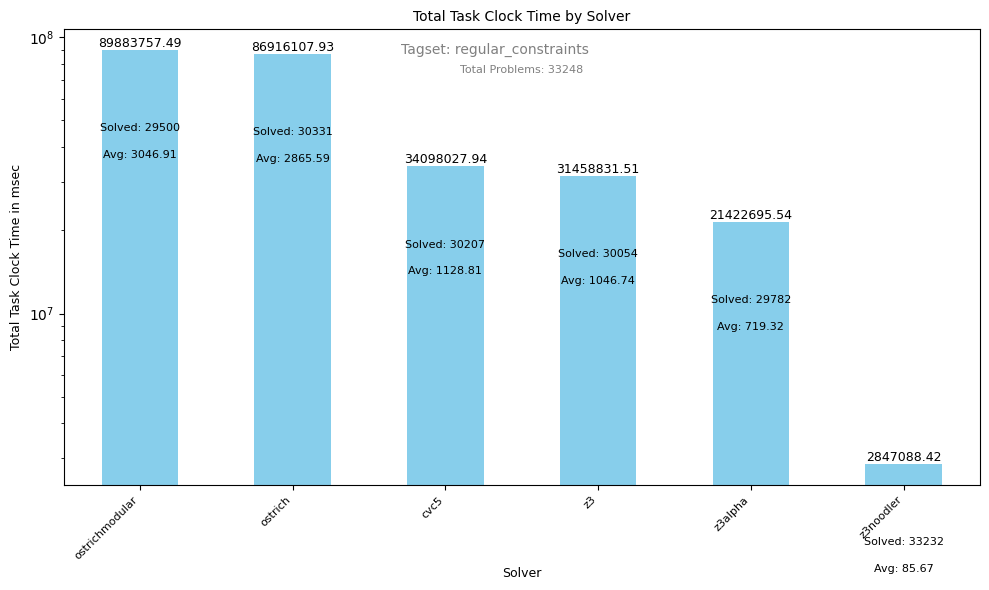

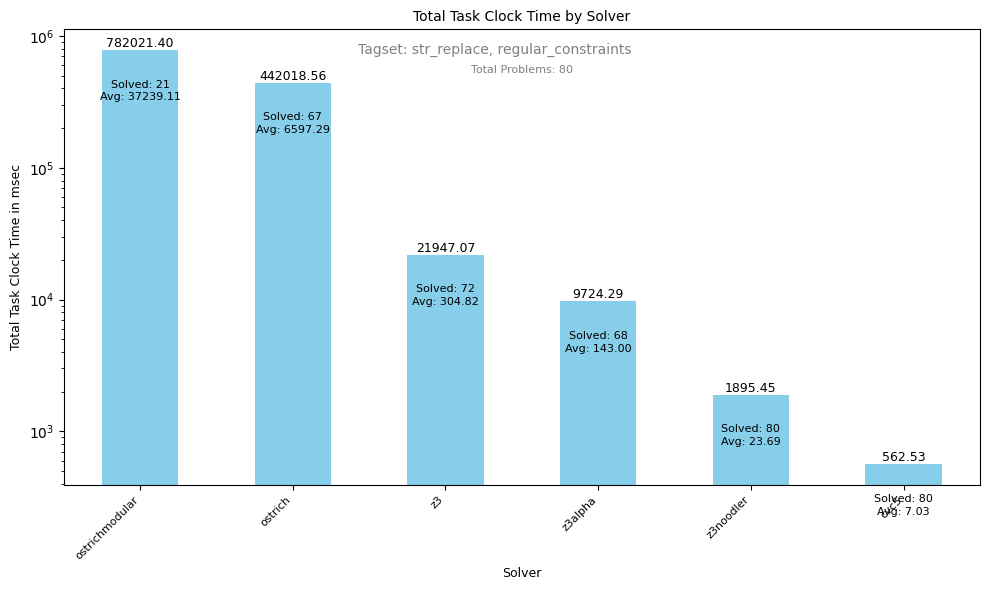

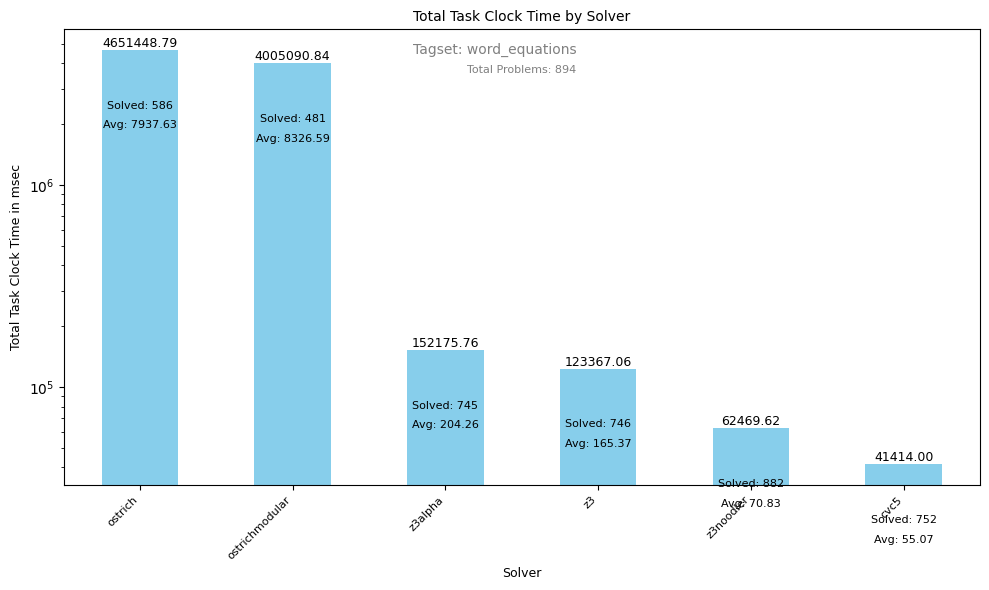

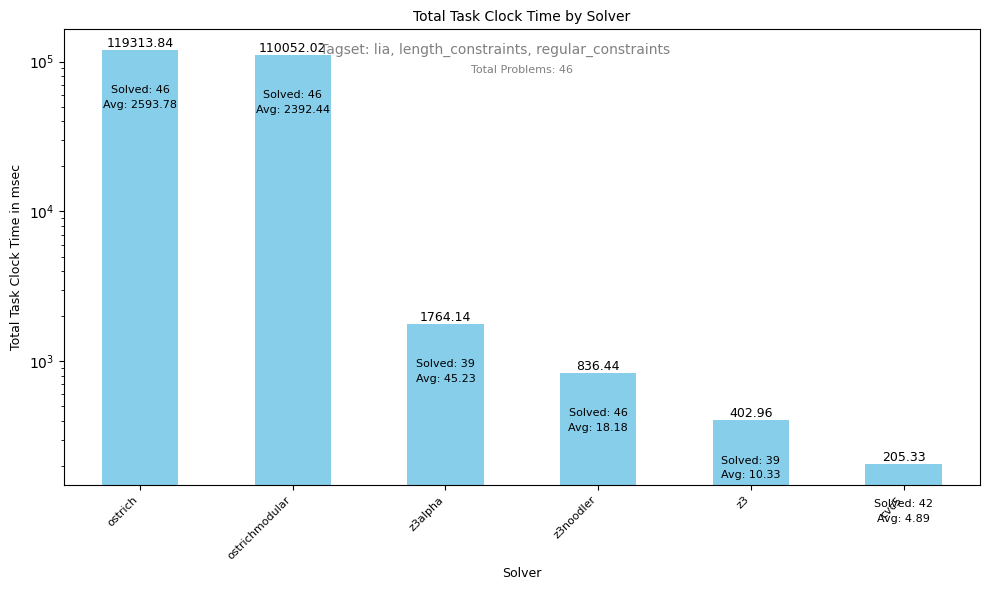

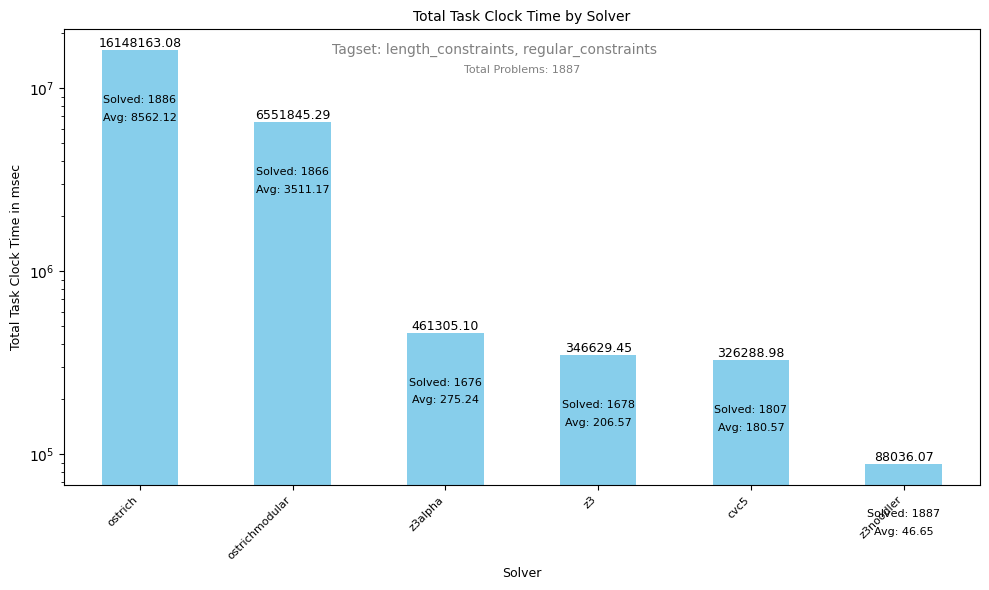

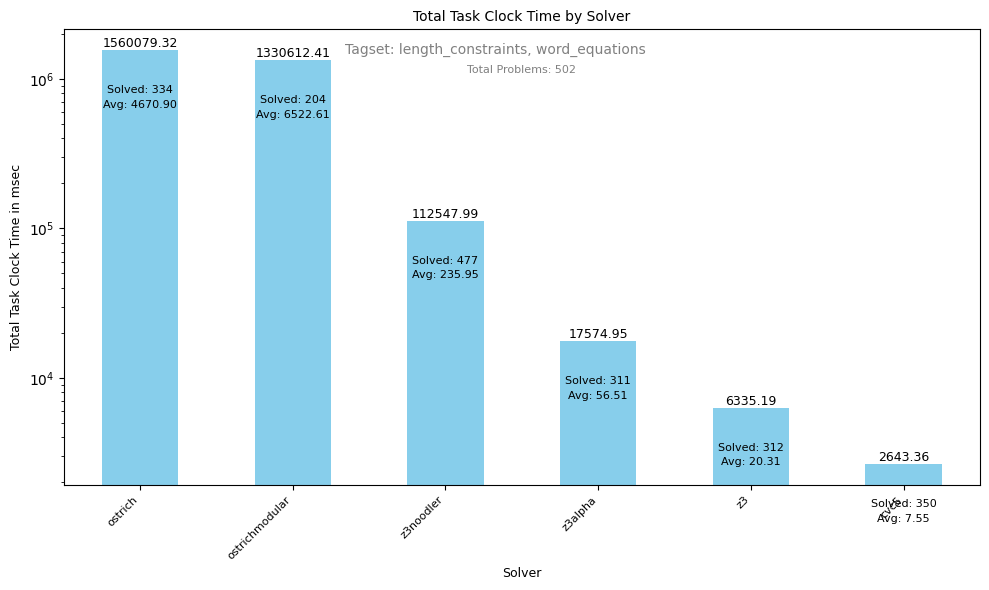

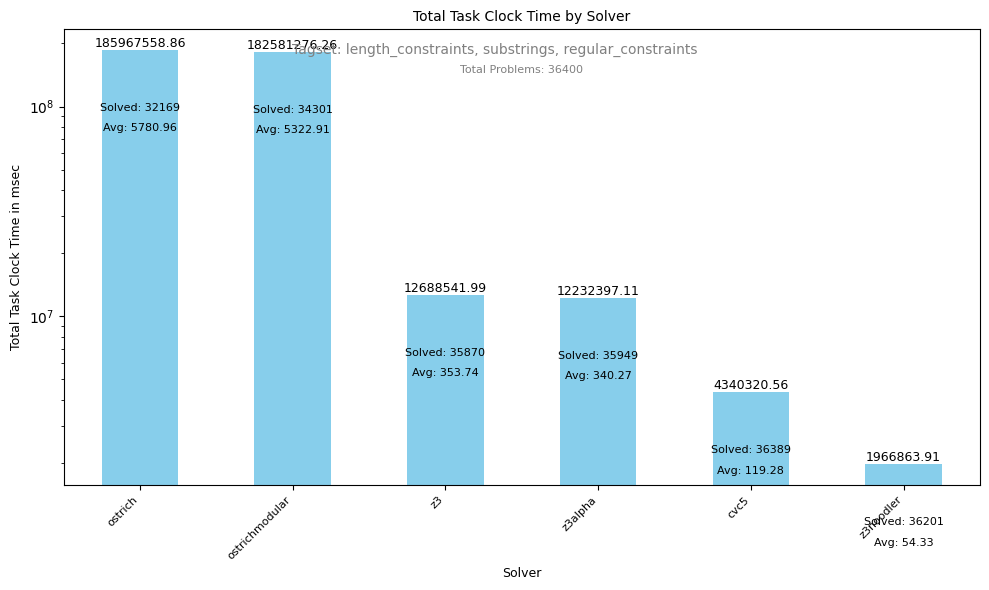

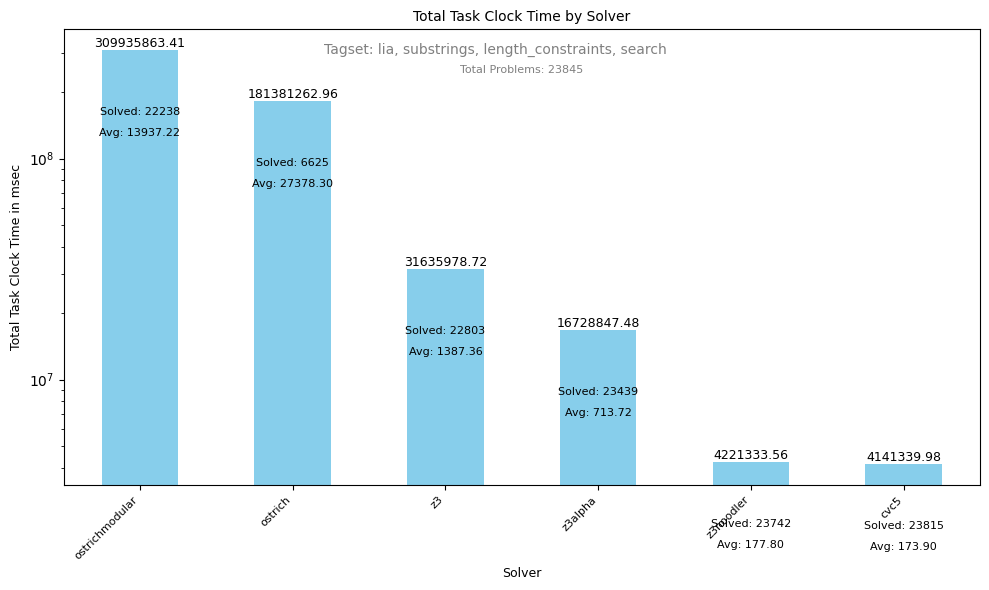

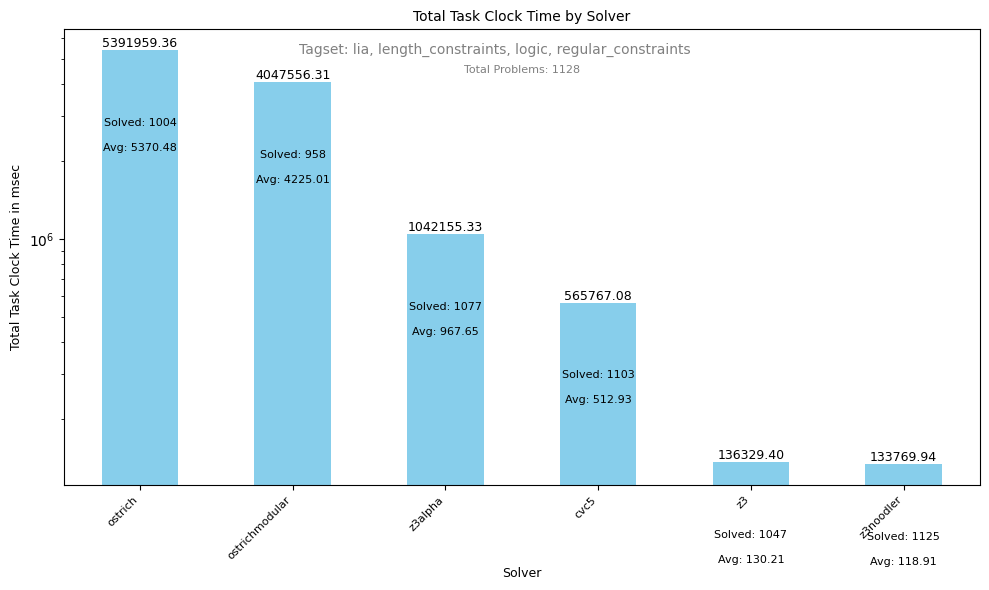

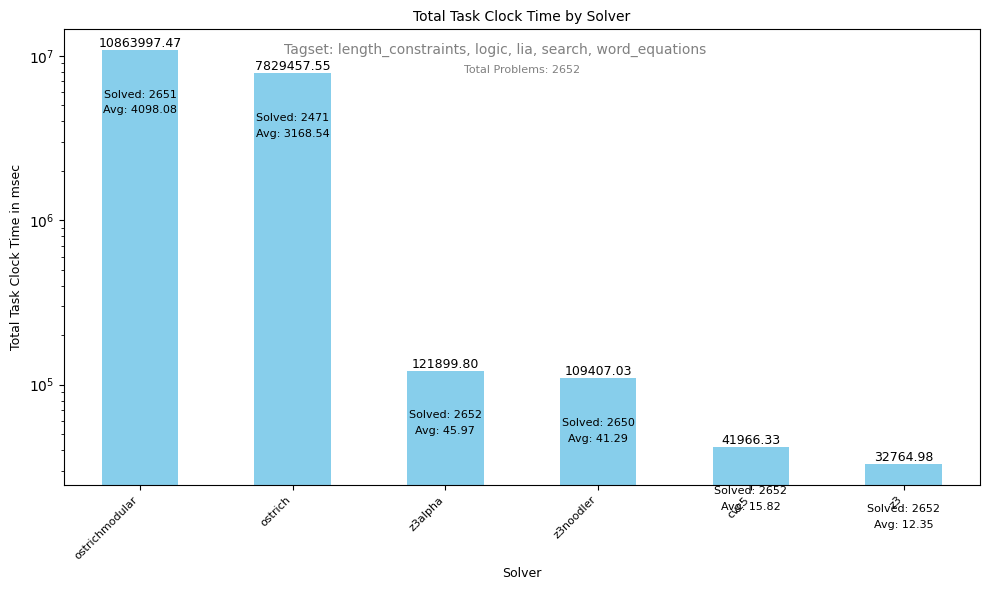

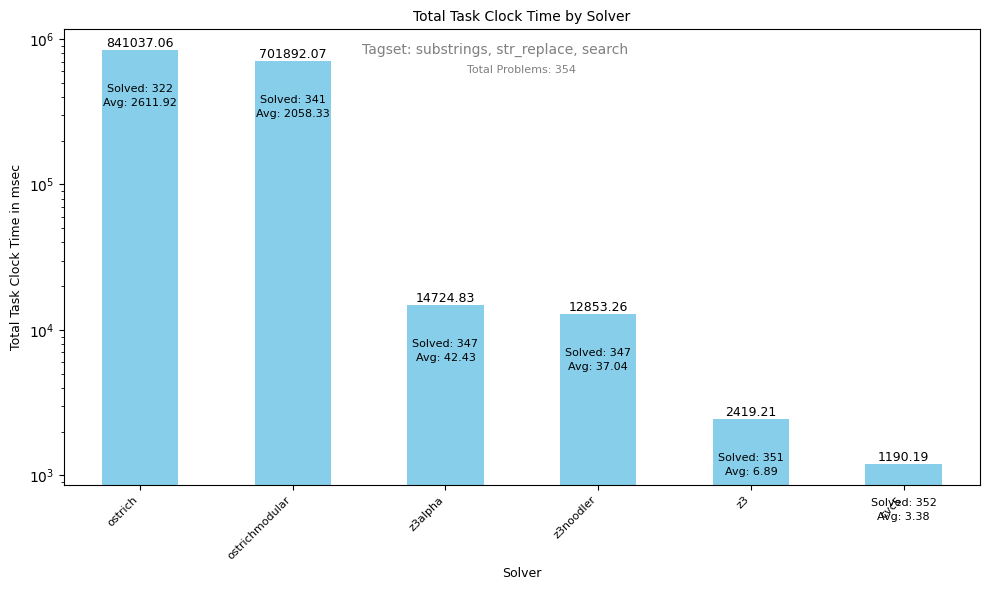

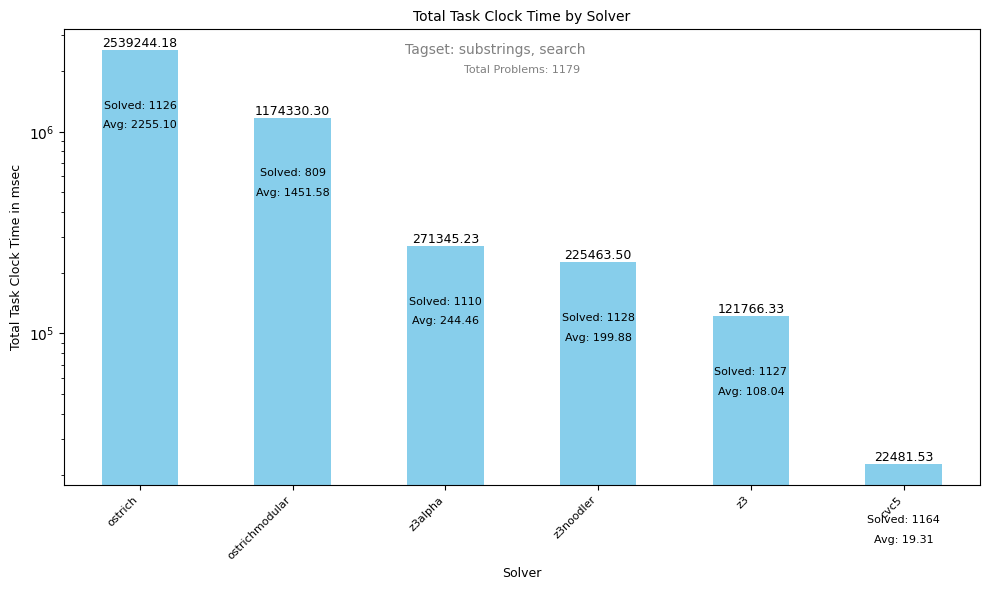

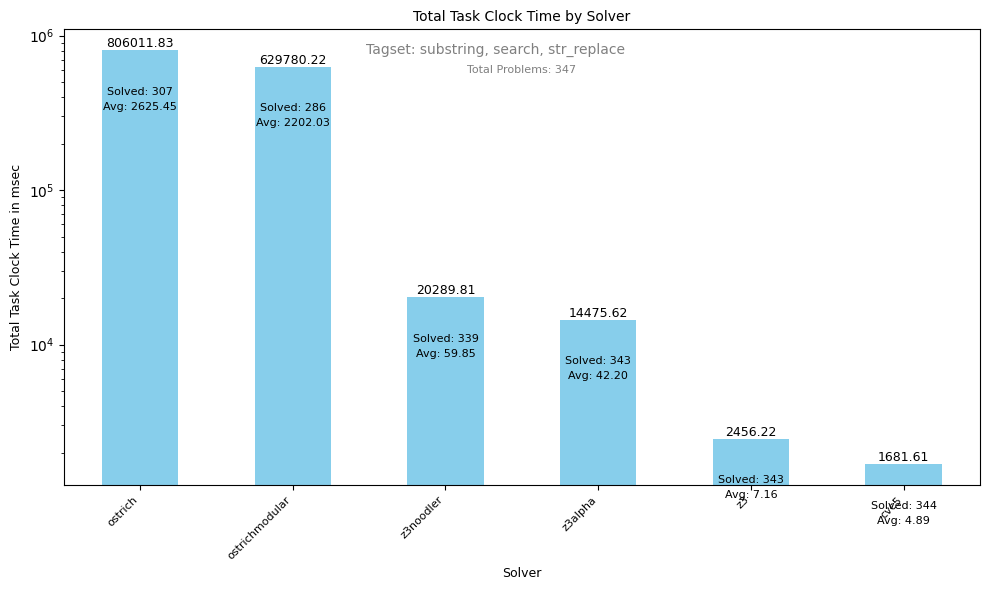

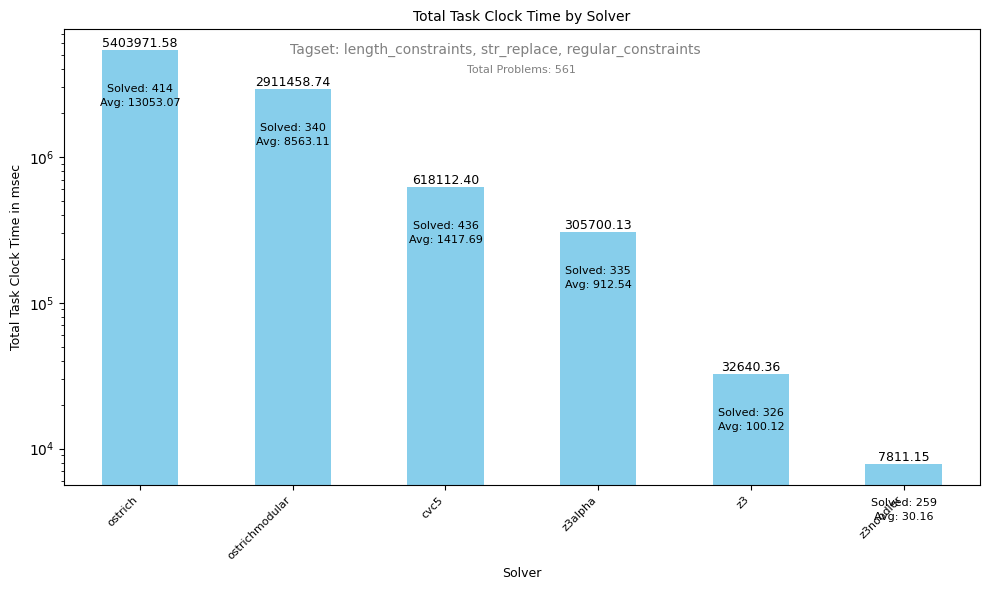

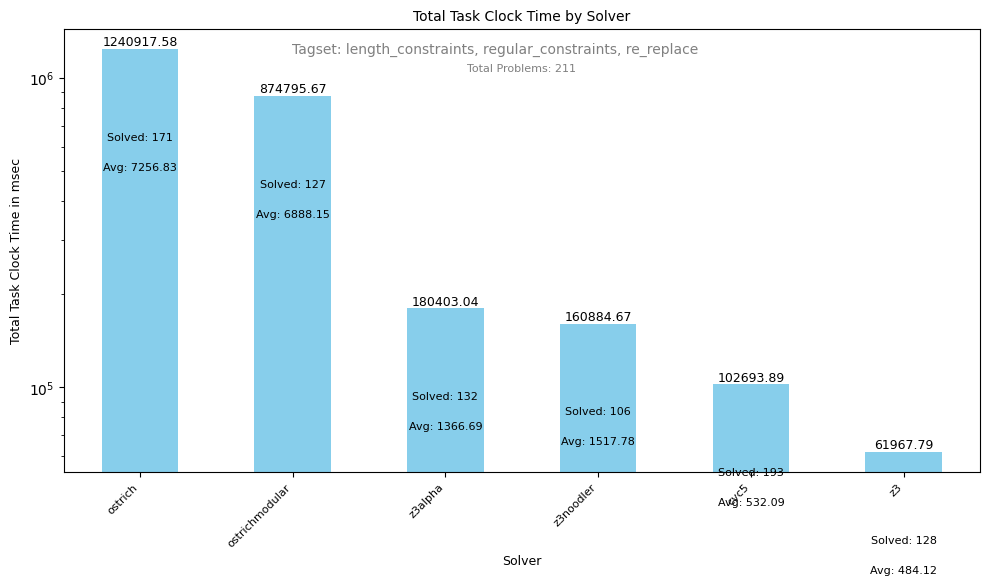

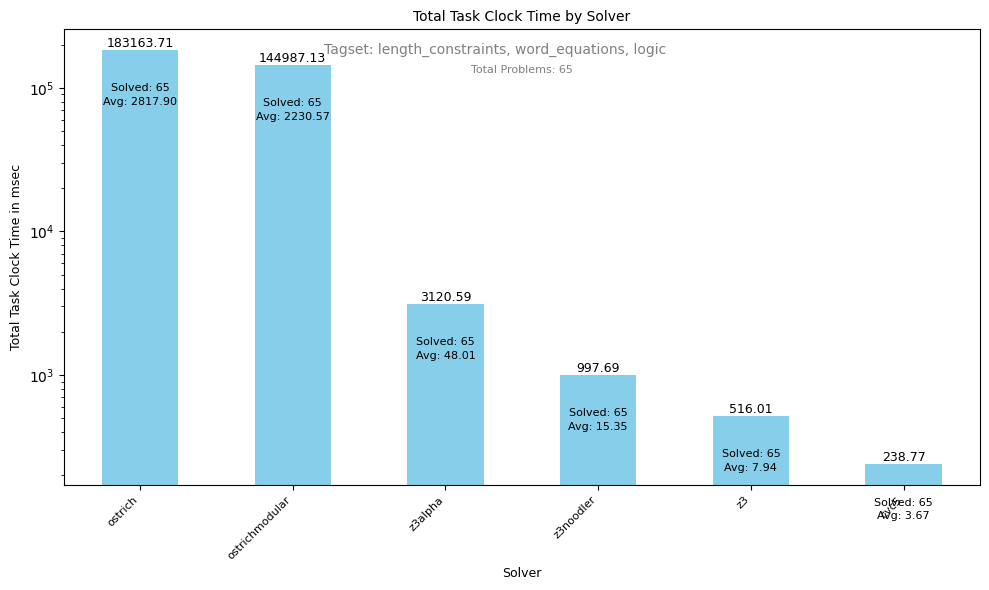

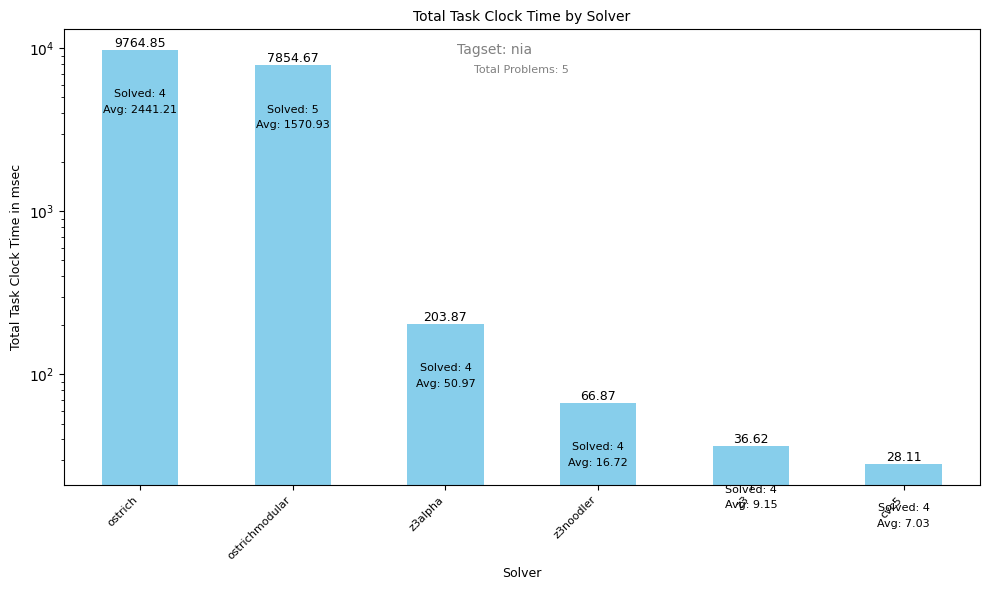

In [9]:
%matplotlib
for tagset in distinct_tag_sets:
    df = tag_util.find_exact_tagset(DF, TAGS, set(tagset))
    if df.size > 0:
        fig = visualizer.sum_time_barchart(df)
        fig.suptitle(f'Tagset: {", ".join(tagset)}', fontsize=10, y=0.92, color='gray')
        

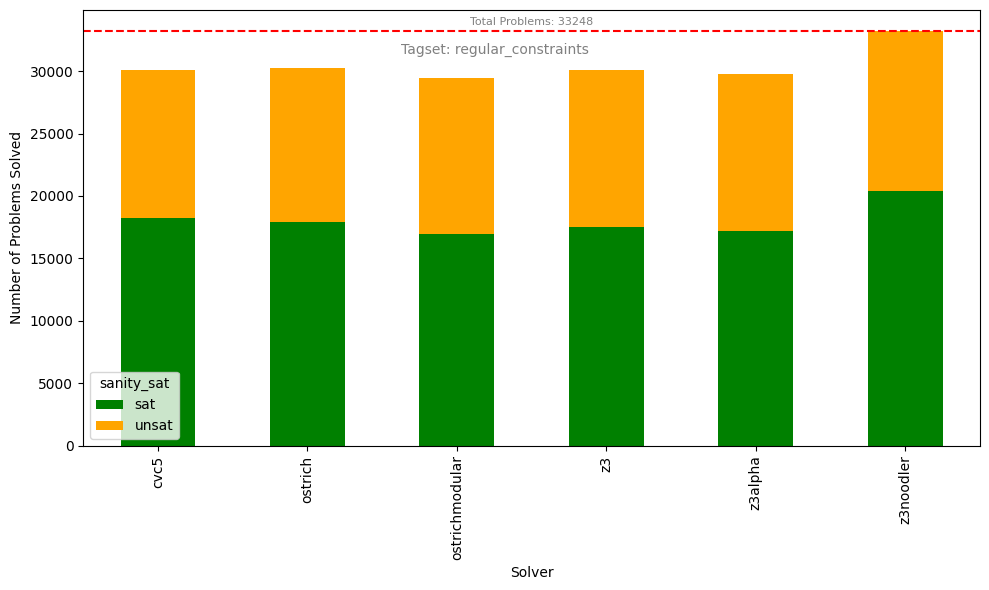

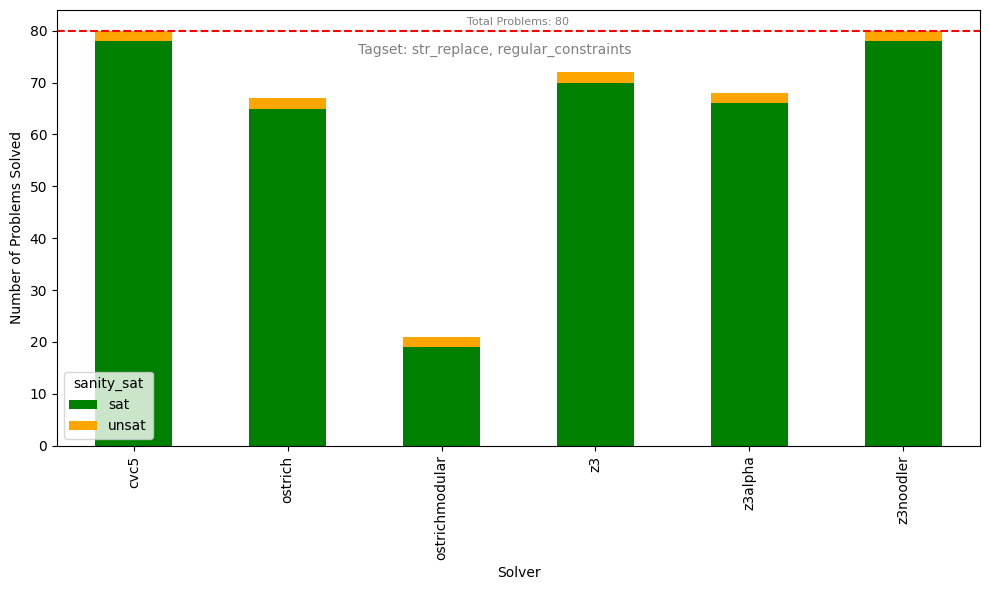

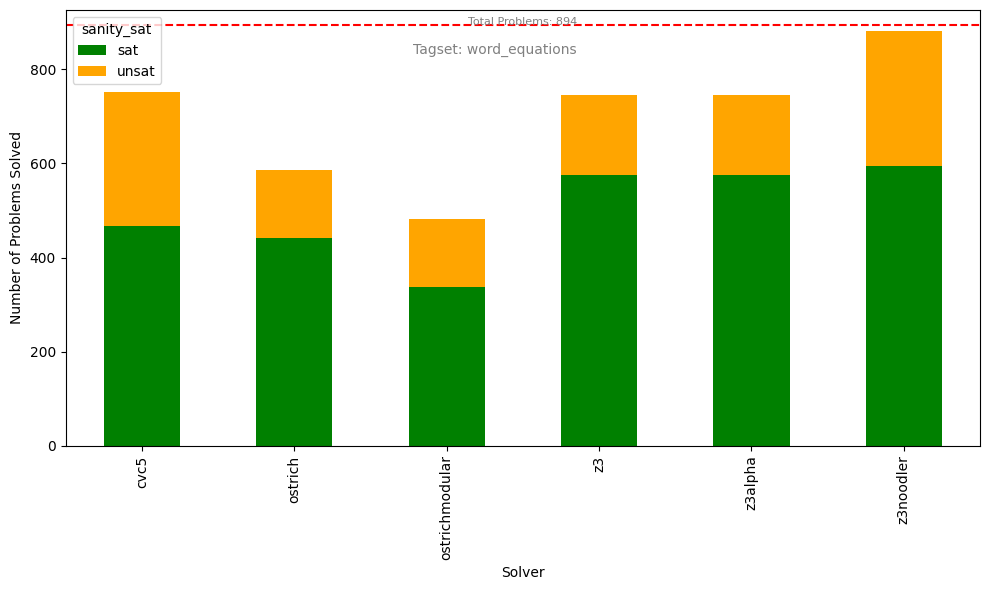

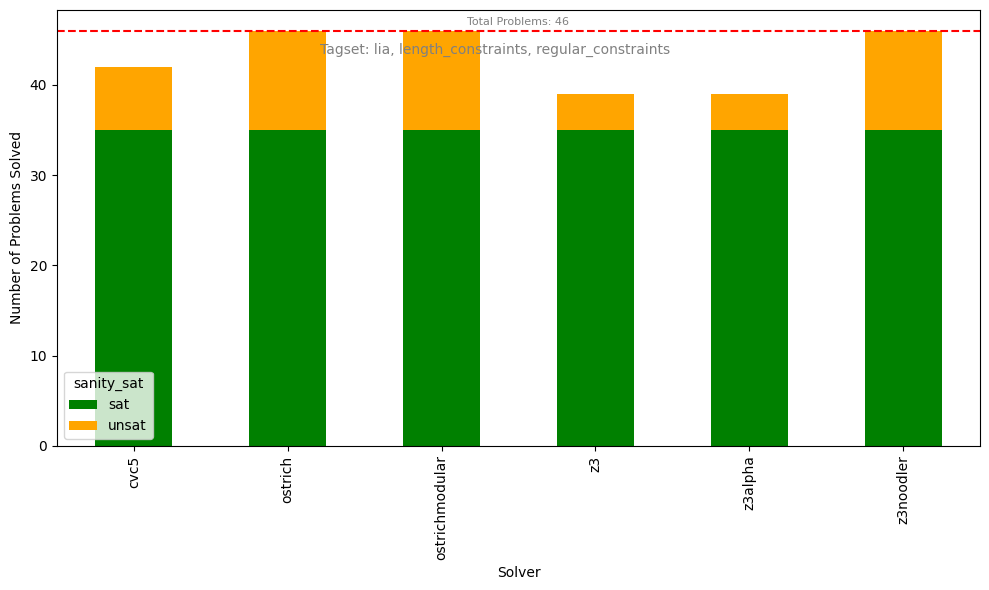

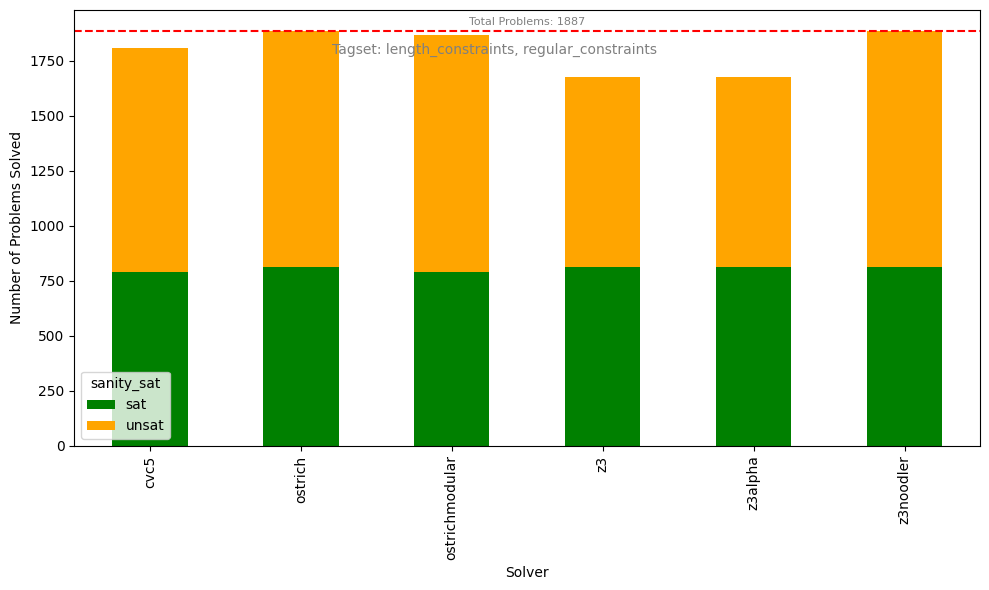

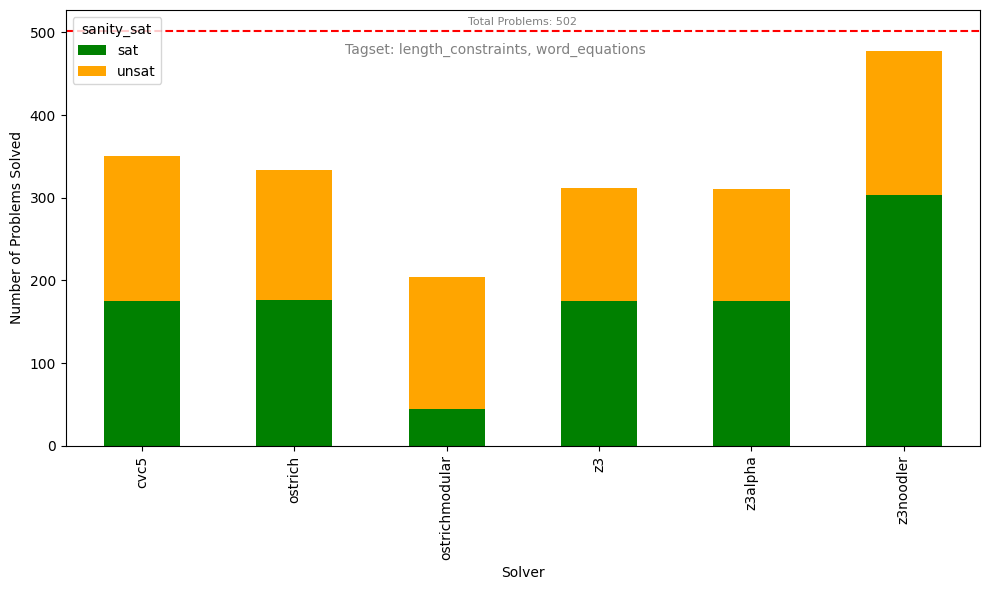

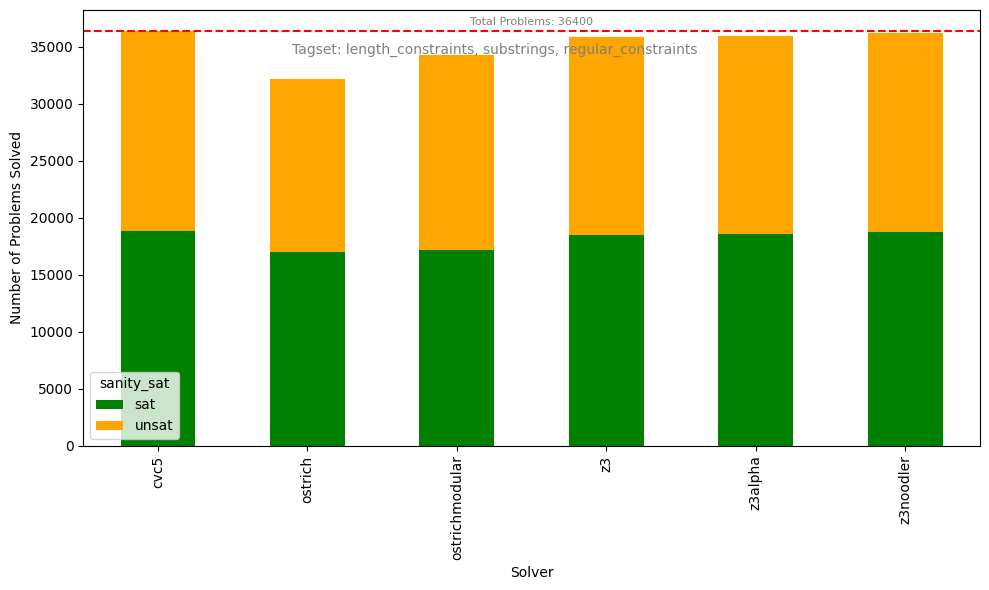

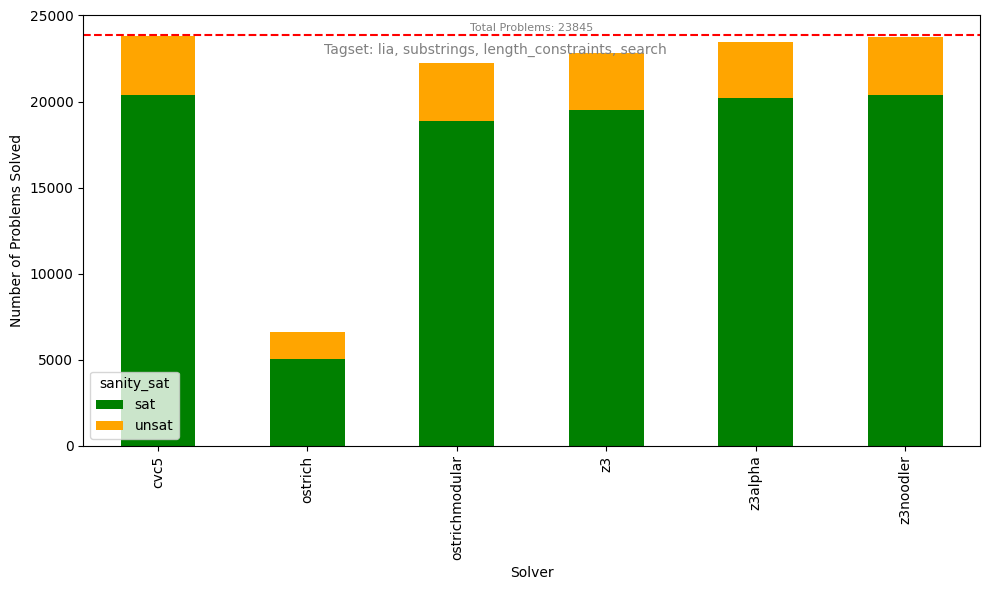

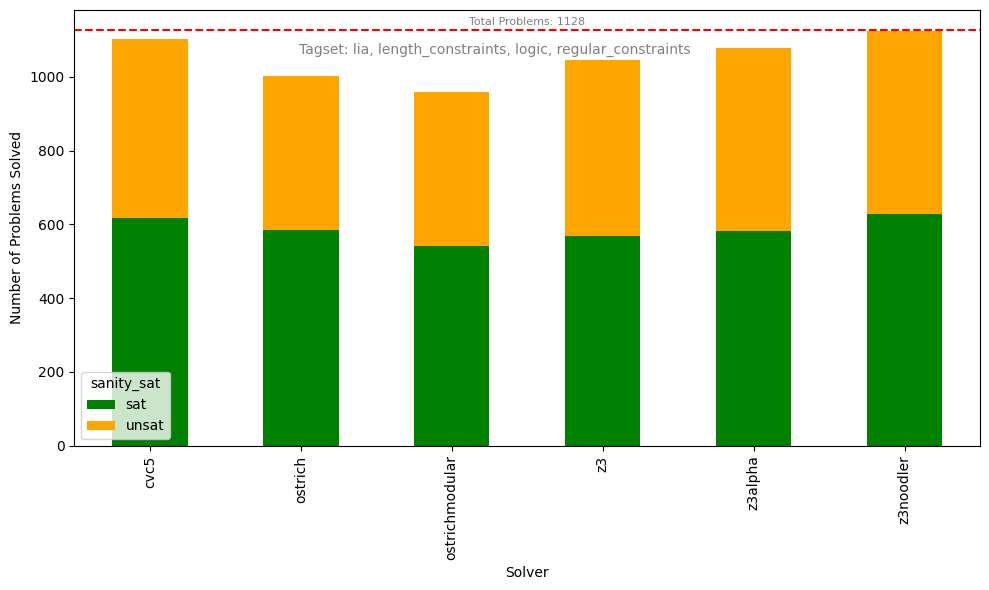

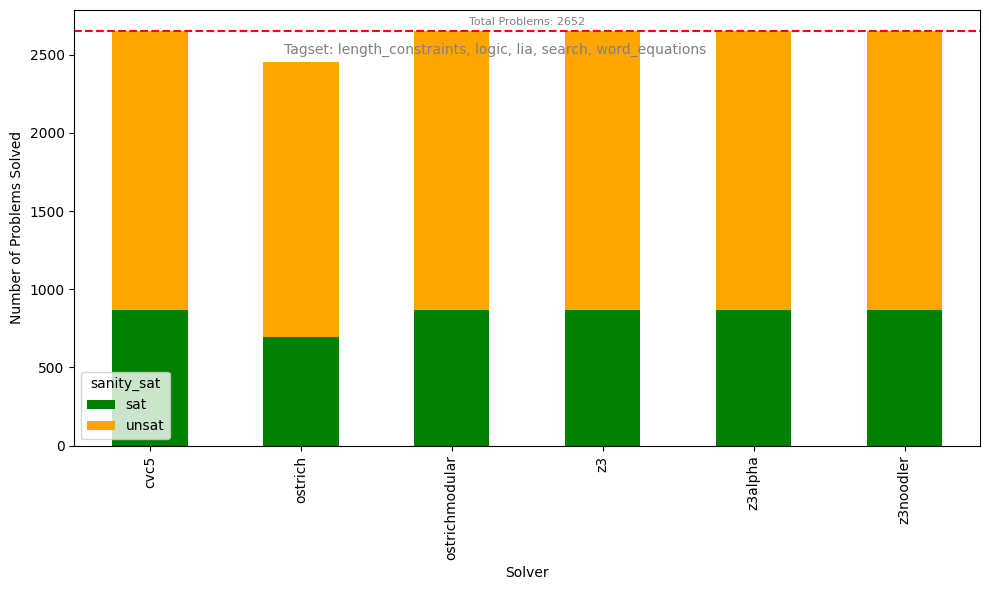

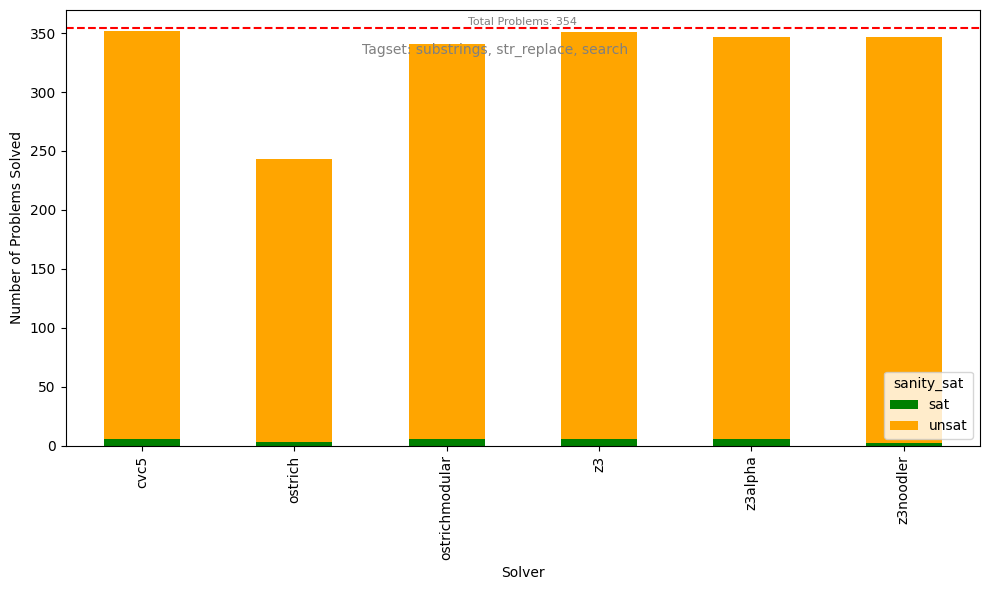

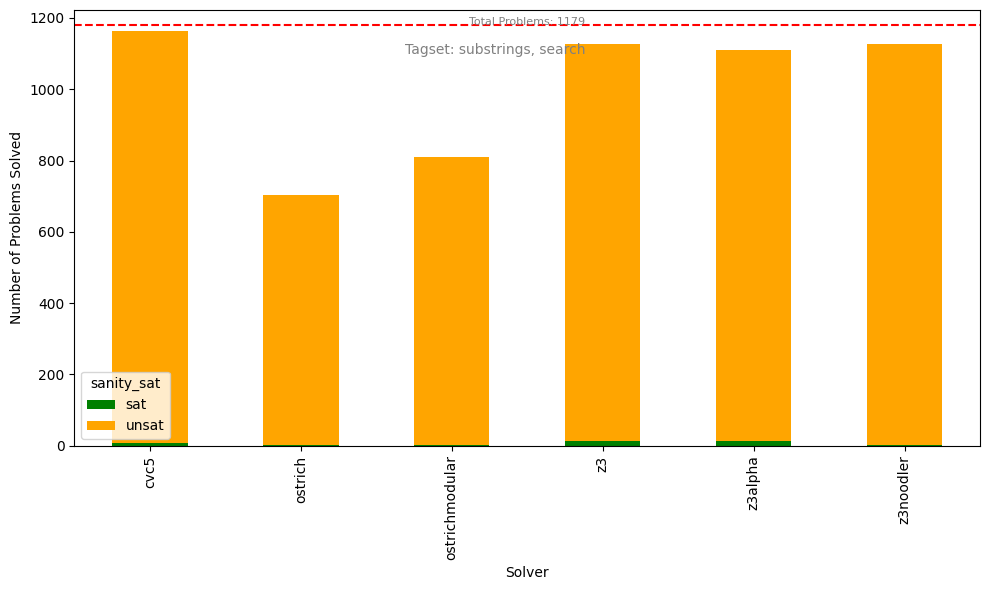

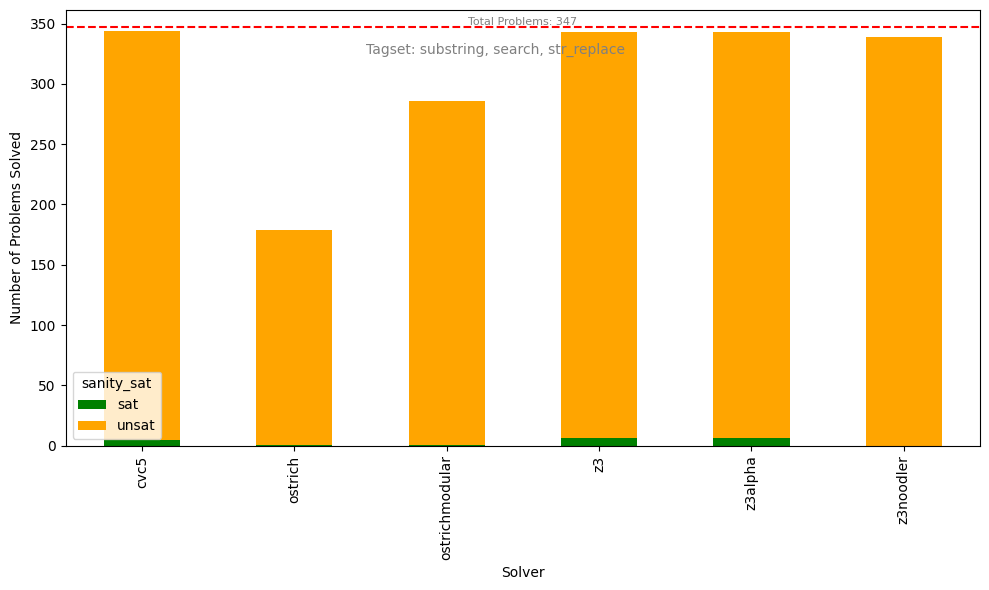

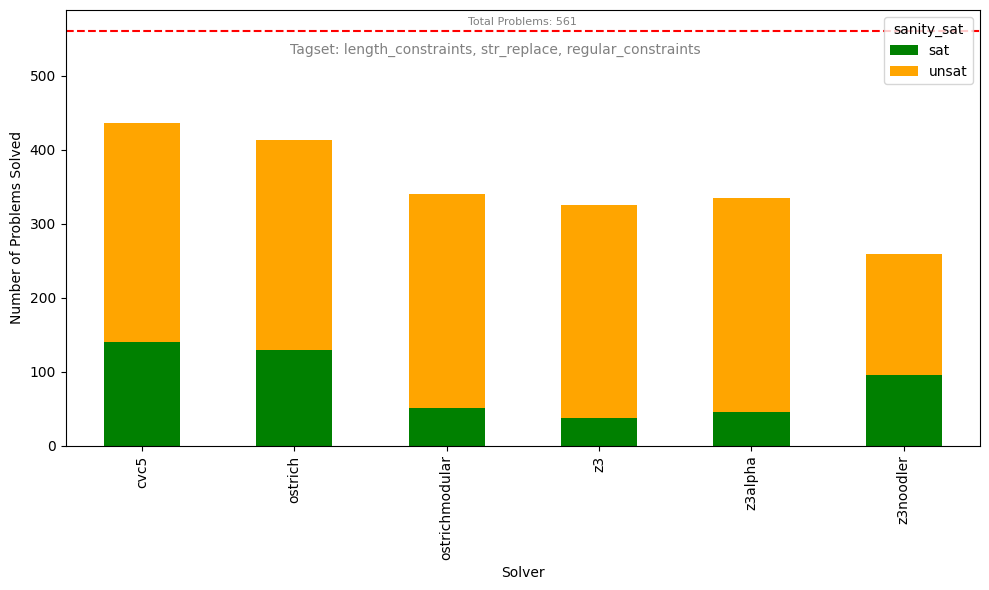

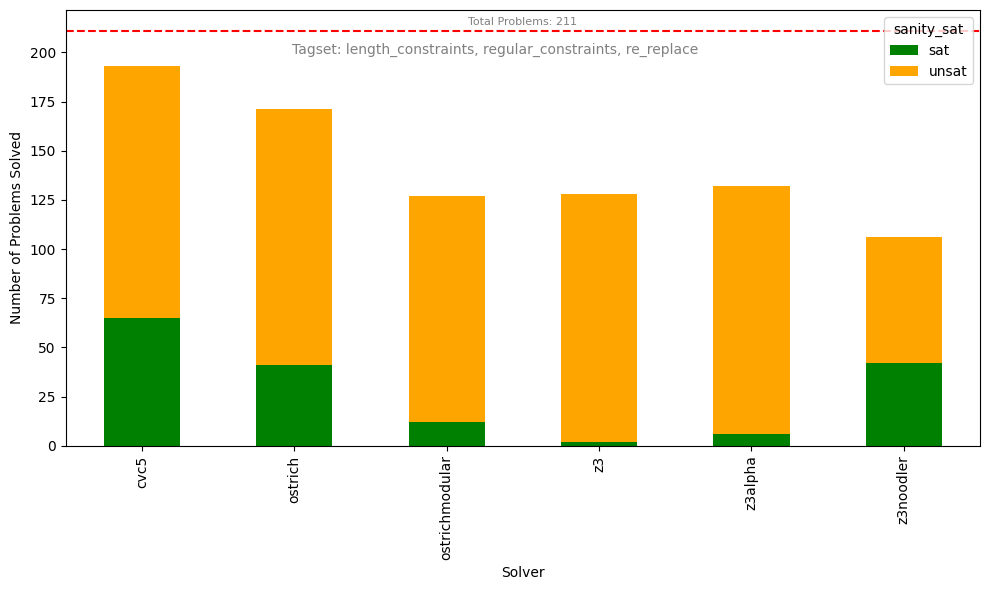

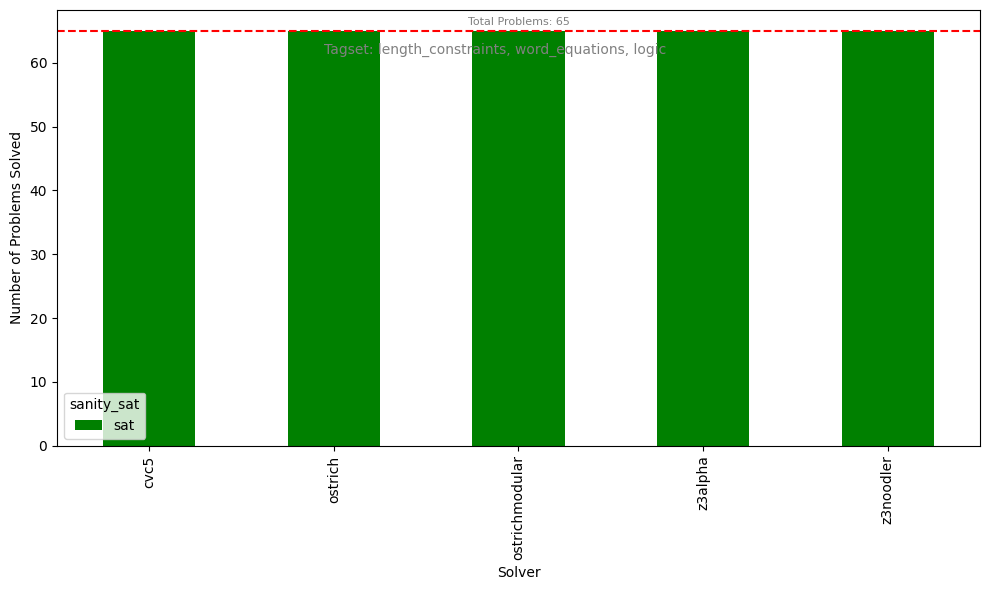

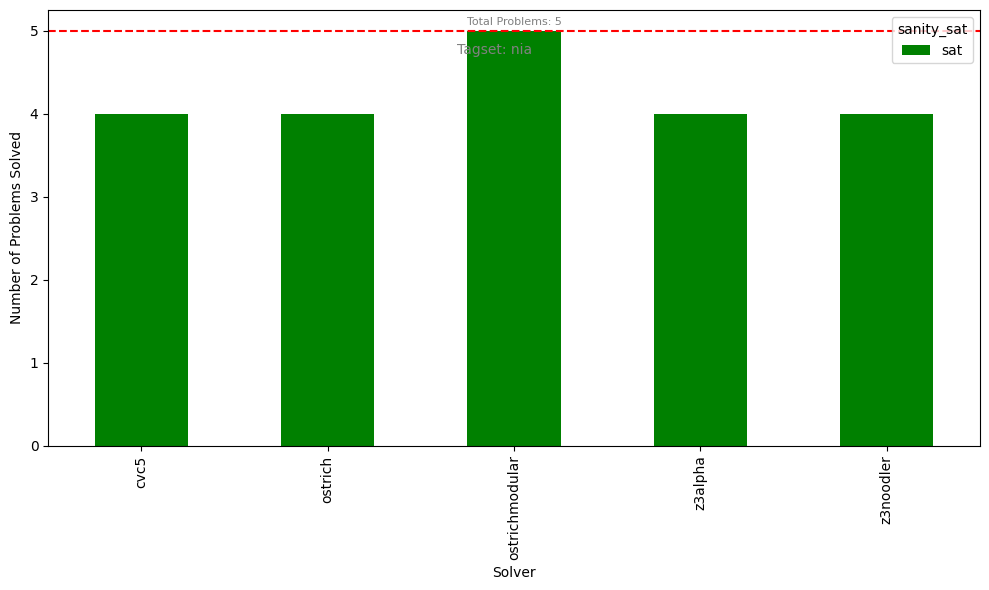

In [10]:
%matplotlib inline
for tagset in distinct_tag_sets:
    df = tag_util.find_exact_tagset(DF, TAGS, set(tagset))
    
    if df.size > 0:
        fig = visualizer.solved_barchart(df)
        fig.suptitle(f'Tagset: {", ".join(tagset)}', fontsize=10, y=0.92, color='gray')

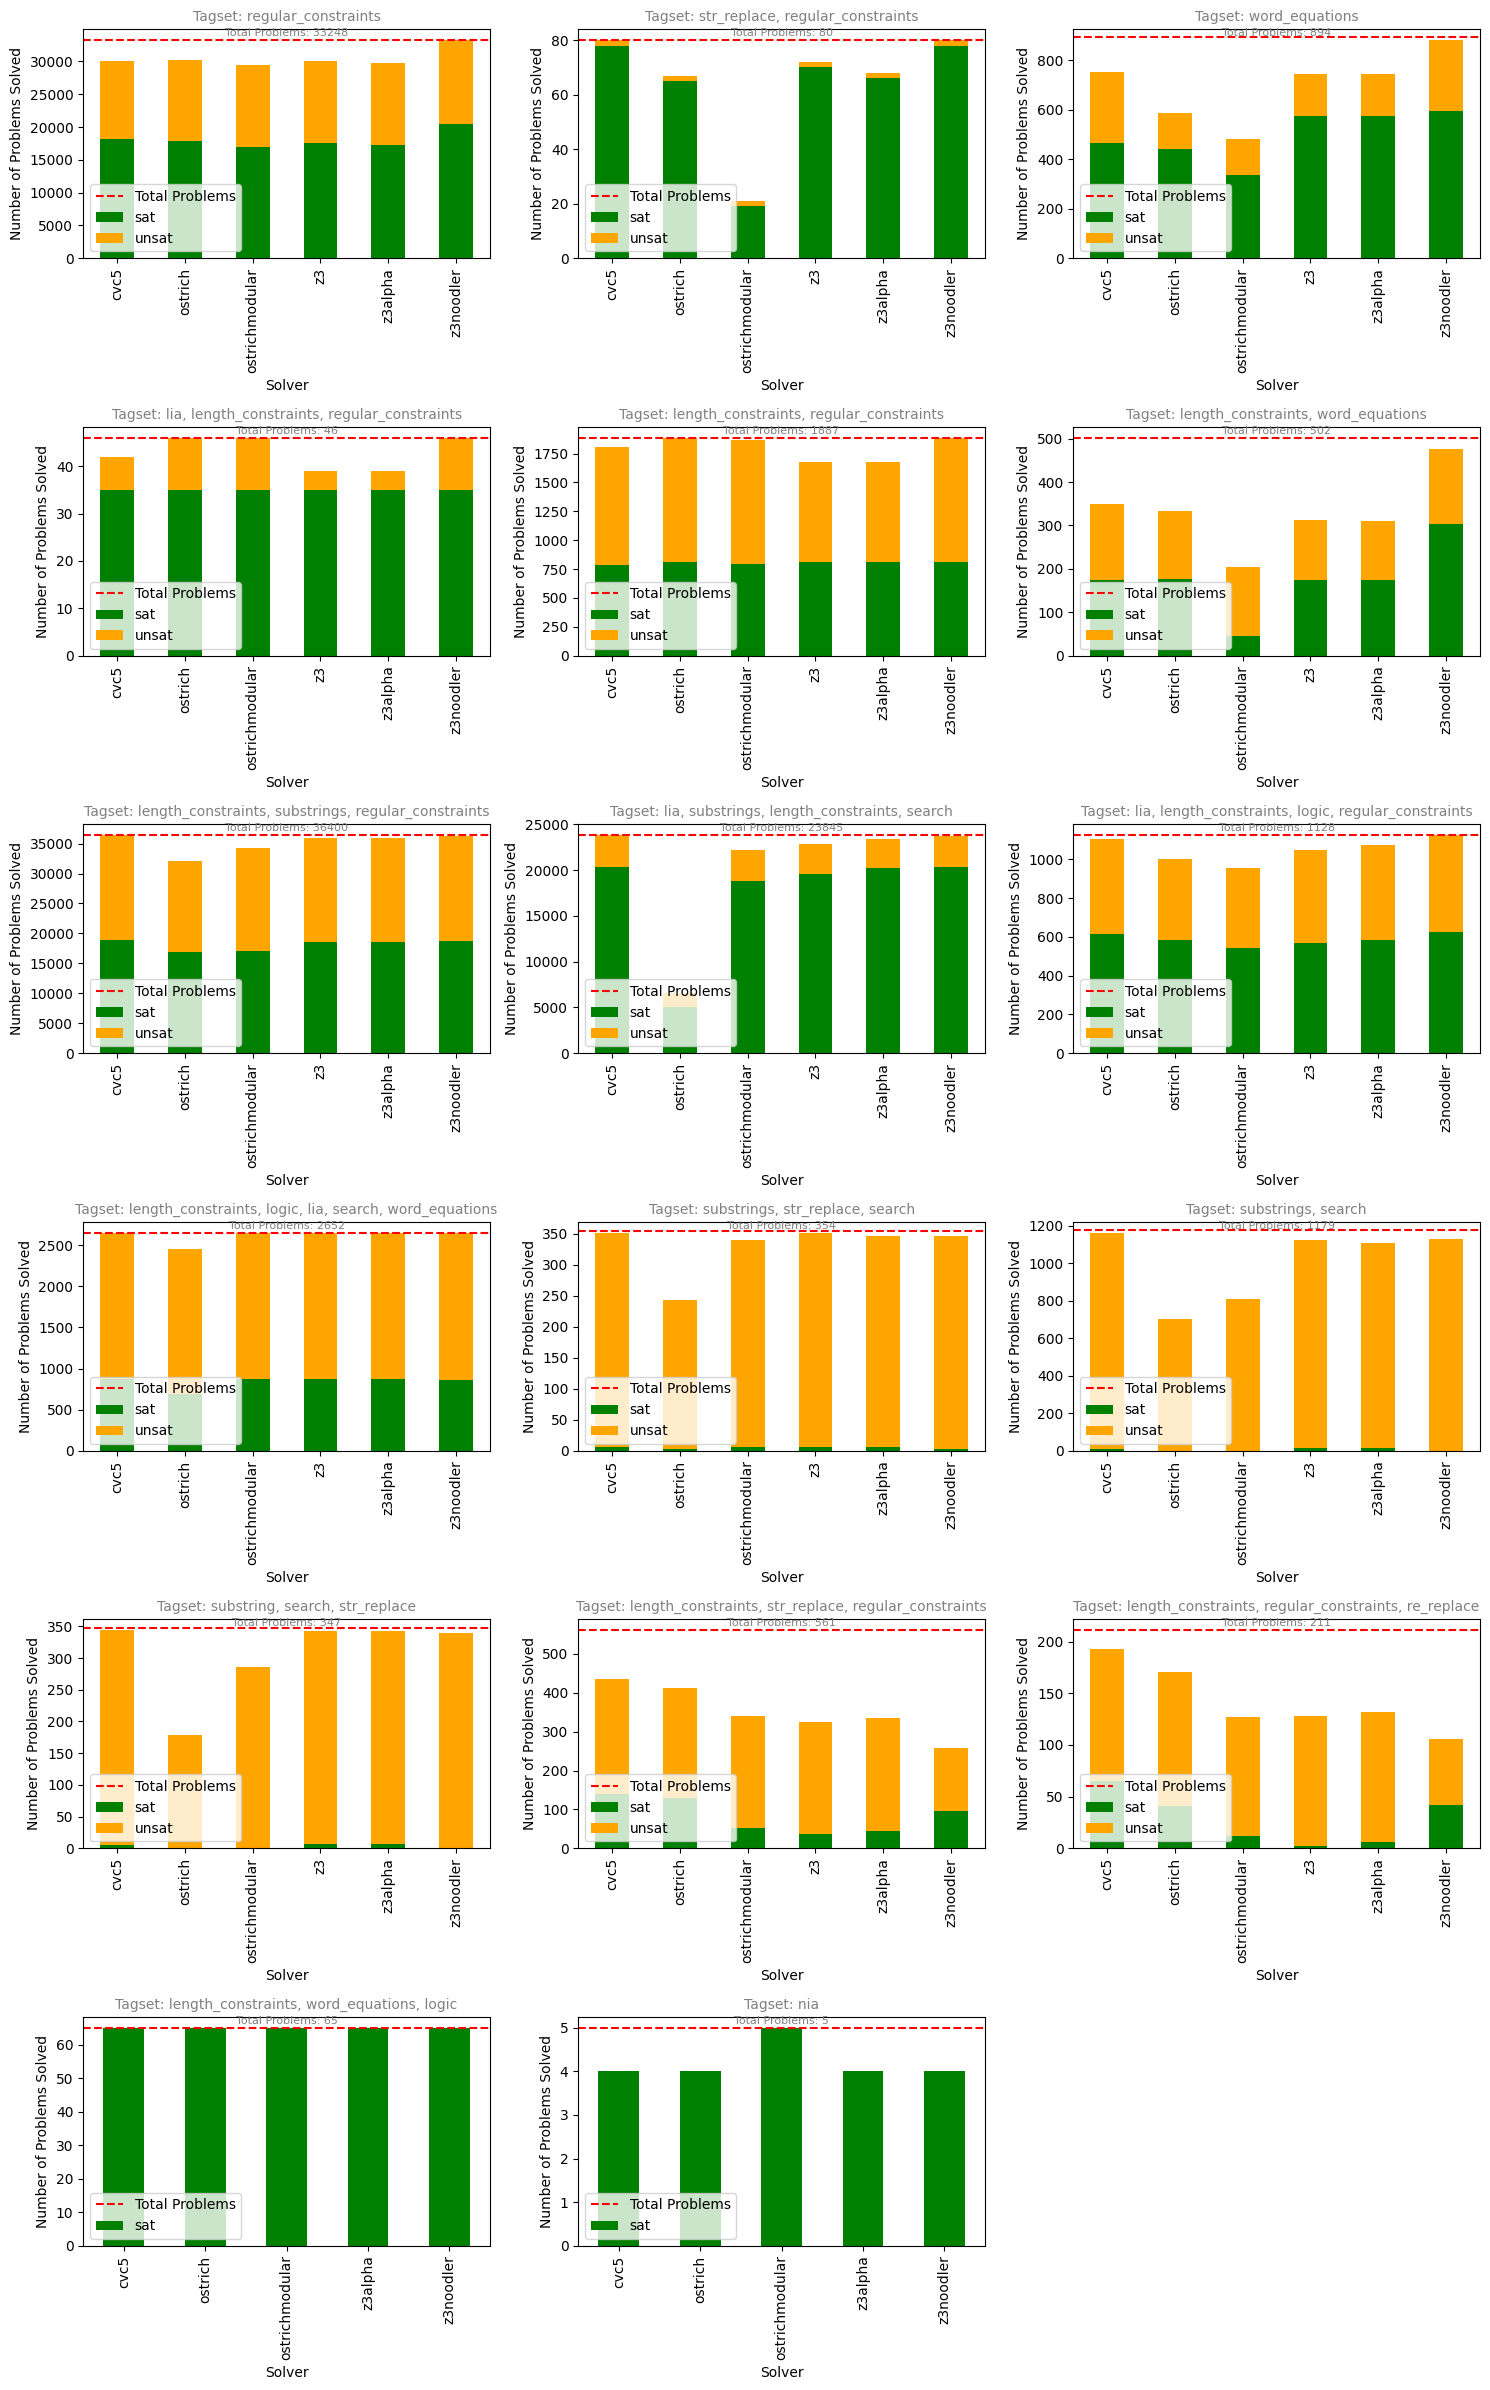

In [13]:
import math
# Determine grid size based on the number of tagsets
num_tagsets = len(distinct_tag_sets)
cols = 3  # Number of columns (adjust as needed)
rows = math.ceil(num_tagsets / cols)  # Calculate the required number of rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten in case of multiple rows and columns

for idx, tagset in enumerate(distinct_tag_sets):
    df = tag_util.find_exact_tagset(DF, TAGS, set(tagset))
    
    if df.size > 0:
        ax = axes[idx]
        visualizer.solved_barchart(df, ax=ax)  # Pass the subplot axis
        ax.set_title(f'Tagset: {", ".join(tagset)}', fontsize=10, color='gray')
        ax.legend(loc='lower left', bbox_to_anchor=(0, 0))
    else:
        axes[idx].axis('off')  # Hide unused subplot if no data

# Hide any remaining empty subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('combined_solved_barcharts.png', dpi=300)